# Create Figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
%matplotlib inline

# Ionization front density jump

The density jump in a ionization front is given by:

\begin{equation}
    \frac{\rho_i}{\rho_0} = \frac{1}{2}\frac{c^2_0}{c^2_i}\left[\mathcal{M}^2 + 1 \pm \left(\left(\mathcal{M}^2 + 1\right)^2 -4\mathcal{M}^2\frac{c^2_i}{c^2_0}\right)^{1/2}\right]
\end{equation}
Where $\rho_x$ is the density of the "x" medium, $0$ for neutral medium ani $i$ for the ionized medium. $\mathcal{M}$ is the Mach number of the neutral medium and $c_x$ is the sound speed of the "x" medium

In [2]:
ci = 10
c0 = 2
cr = ci/c0

In [3]:
Mr = cr*(1 + np.sqrt(1 - 1./cr**2))
Md = cr*(1 - np.sqrt(1 - 1./cr**2))
Ms = np.logspace(-3, np.log10(Md), 100)
MS = np.logspace(np.log10(Mr), 3, 100)
sns.set_style("whitegrid")

In [4]:
def D(M):
    """
    Discriminant of jump density function
    """
    return np.sqrt((M**2+1)**2 - 4*(M*cr)**2)

In [5]:
Xdw = 0.5/cr**2*(Ms**2 + 1 - D(Ms))
Xds = 0.5/cr**2*(Ms**2 + 1 + D(Ms))
Xrw = 0.5/cr**2*(MS**2 + 1 - D(MS))
Xrs = 0.5/cr**2*(MS**2 + 1 + D(MS))

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


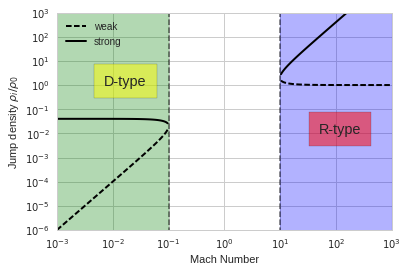

In [6]:
plt.plot(Ms, Xdw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Xds, lw=2, c="k", linestyle="-")
plt.plot(MS, Xrw, lw=2, c="k", linestyle="--")
plt.plot(MS, Xrs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-6, 1e3)
plt.text(0.007, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(50, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel(r"Jump density $\rho_i/\rho_0$")
plt.savefig("./Figures/IF-types.pdf")

## Velocity Jump

The jump velocity can be easiliy derived from continuity equation:
\begin{equation}
\mathcal{M}_i = \mathcal{M}\frac{c_0}{c_i}\frac{\rho_0}{\rho_i}
\end{equation}

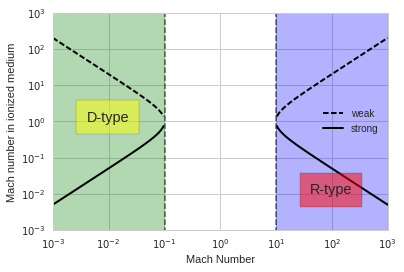

In [7]:
Midw = Ms/(cr*Xdw)
Mids = Ms/(cr*Xds)
Mirw = MS/(cr*Xrw)
Mirs = MS/(cr*Xrs)
plt.plot(Ms, Midw, lw=2, c="k", linestyle="--", label="weak")
plt.plot(Ms, Mids, lw=2, c="k", linestyle="-")
plt.plot(MS, Mirw, lw=2, c="k", linestyle="--")
plt.plot(MS, Mirs, lw=2, c="k", linestyle="-", label="strong")
plt.plot([Md, Md], [0, 1000], "k--", alpha=0.5)
plt.plot([Mr, Mr], [0, 1000], "k--", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 1e3)
plt.ylim(1e-3, 1e3)
plt.text(0.004, 1, "D-type", fontsize="x-large", bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':10})
plt.text(40, 0.01, "R-type", fontsize="x-large", bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.fill_between([1e-3, Md], 1e3, alpha = 0.3, color="green")
plt.fill_between([Mr, 1e3], 1e3, alpha = 0.3, color="blue")
plt.legend(loc="best")
plt.xlabel("Mach Number")
plt.ylabel("Mach number in ionized medium")
plt.savefig("./Figures/IF-vel-jump.pdf")

# Shapes of thin shell bowshocks

Make a figure for:
 - Cantoids and ancantoids bow shocks with fixed $\beta$ (show the anisotropy effects)
 - Show bow shocks with fixed anisotropy index (cantoids and wikinoids in one figure and ancantoids separately with high and low anisotropy index) and varying $\beta$

In [8]:
import sys
sys.path.insert(0,"../bowshock-shape/")
from equation6 import Shell
from scipy.interpolate import interp1d

In [9]:
theta = np.linspace(0, np.pi, 100, endpoint=False)
beta = ["wilkinoid", 1e-3, 1e-2, 0.05, 0.08, 0.5, 0.99]
index = ["cantoid", 1.0, 0.8, 0.6, 0.4]

In [10]:
def complete_shape(r, t):
    """
    Gives the mirror part of the bow shock shape
    """
    t_com = np.array([-t, t])
    r_com = np.array([r, r])
    t_com, r_com = t_com.reshape(2*len(t)), r_com.reshape(2*len(r))
    t_com, r_com = zip(*sorted(zip(t_com, r_com)))
    return t_com, r_com

In [11]:
def wilkinoid(t):
    """
    Draws the wilkinoid shape, normalized with R0
    """
    R = np.sqrt(3*(1-t/np.tan(t))/np.sin(t)**2)
    R[0] = 1.
    return R

## Figure with varying $\beta$, for cantoids and ancantoids

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


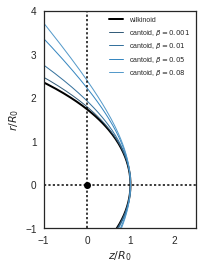

In [12]:
sns.set_style("white")
colors = sns.color_palette("Blues_d", n_colors=len(beta))
for b, c in zip(beta[:-2], colors[:-2]):
    if b=="wilkinoid":
        R = wilkinoid(theta)
        label= "wilkinoid"
        col = "k"
        lw = 2
    else:
        shell = Shell(beta=b, innertype="isotropic")
        r = shell.radius(theta)
        R = r/r[0] # Normalize radius with R0
        label= r"cantoid, $\beta={}$".format(b)
        col = c
        lw = 1
    t = np.zeros_like(2*theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, c=col, linewidth = lw)
plt.plot([0], [0], "ko")
plt.plot([-1.5, 3], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 5], "k:", lw=1.5)
plt.legend(fontsize="x-small", ncol=1, loc="upper right")
plt.axes().set_aspect('equal')
plt.xlim(-1, 2.5)
plt.ylim(-1, 4)
plt.xlabel(r"$z/R_0$")
plt.ylabel(r"$r/R_0$")
plt.savefig("./Figures/cantoid-wilkinoid-shape.pdf")

## Figure with fixed anisotropy index ancantoids

Proplyd case: $k = 0.5$, $\xi =0.8$

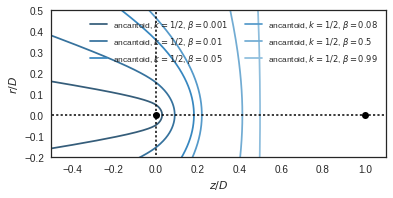

In [13]:
for b, c in zip(beta[1:], colors[1:]):
    proplyd = Shell(beta=b, innertype="proplyd")
    R = proplyd.radius(theta)
    label= r"ancantoid, $k = 1/2$, $\beta={}$".format(b)
    t = np.zeros_like(2*theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, c=c)
plt.plot([0], [0], "ko")
plt.plot([1], [0], "ko")
plt.plot([-1.5, 1.5], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 1.5], "k:", lw=1.5)
plt.legend(fontsize="small", ncol=2, loc="best")
plt.axes().set_aspect('equal')
plt.xlim(-0.5, 1.1)
plt.ylim(-0.2, 0.5)
plt.xlabel(r"$z/D$")
plt.ylabel(r"$r/D$")
plt.savefig("./Figures/ancantoid-shape.pdf")

## Figure using fixed $\beta$

Fixed $\beta = 0.01$, varying from cantoid to very anisotropic ancantoid

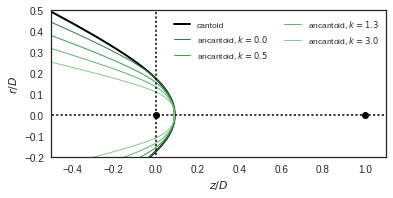

In [14]:
colors_x = sns.color_palette("Greens_d", n_colors=len(index))
for xi, c in zip(index, colors_x):
    if xi=="cantoid":
        shell = Shell(beta=0.01, innertype="isotropic")
        label= "cantoid"
        lw = 2
        col = "k"
    else:
        shell = Shell(beta=0.01, innertype="anisotropic", xi=xi)
        k = 2./xi-2
        label= r"ancantoid, $k={:.1f}$".format(k)
        lw = 1
        col = c
    R = shell.radius(theta)
    t, R = complete_shape(R, theta)
    x, y = R*np.cos(t), R*np.sin(t)
    x, y = R*np.cos(t), R*np.sin(t)
    plt.plot(x, y, label=label, linewidth=lw, c=col)
plt.plot([0], [0], "ko")
plt.plot([1], [0], "ko")
plt.plot([-1.5, 1.5], [0, 0], "k:", lw=1.5)
plt.plot([0, 0], [-1.5, 1.5], "k:", lw=1.5)
plt.legend(fontsize="small", ncol=2, loc="best")
plt.axes().set_aspect('equal')
plt.xlim(-0.5, 1.1)
plt.ylim(-0.2, 0.5)
plt.xlabel(r"$z/D$")
plt.ylabel(r"$r/D$")
plt.savefig("./Figures/cantoid-ancantoid-shape-bfixed.pdf")

# $\Pi$ vs $\Lambda$ diagnostic diagram

We need the formulae from CRW model chapter:

\begin{equation}
\Lambda = \frac{\left(3\xi\right)^{1/2}\left(1+\beta^{1/2}\right)}{\left(1 + \frac{1}{5}\xi\beta\right)^{1/2}\left(1-\xi\beta\right)}
\end{equation}

\begin{equation}
\Pi = \left|1-2R_{\theta,\theta}\right|^{-1}
\end{equation}

$$R_{\theta,\theta} = \frac{C_{k\beta}}{1+\beta^{1/2}} + \frac{1+2\beta^{1/2}}{6}$$

$$C_{k\beta} = \frac{1}{2}\left(A_k - \frac{\beta}{15}\right)$$

$$A_k = \frac{1}{15} - \frac{3k}{20}$$

Start defining arrays for $\xi$ and $\beta$

In [15]:
beta_arr = np.linspace(1e-4, 0.99, 100)
xi = np.array([1.0, 0.8, 0.6, 0.4])
sb = np.sqrt(beta_arr)
beta_d = np.array([1e-3, 1e-2, 1e-1, 0.5])

Calculating alatude and planitude for each anisotropy index

We will include a numerical calculation of $R_c$ and $R_{90}$, marked with filled circles to compare with the analytical curves. This numerical results will be useful when estimating the projected alatude and planitude (instead of the two quadrics fit)

In [16]:
def num_fit(r, t, dt=np.radians(30.), epsilon=1e-4, debug=False):
    """
    Find numerical estimations of planitude of r(t):
    Rc: Fit r as r \simeq R0 + Rtt*t^2 + R4t*t^4 and use Rtt to estimate \Pi using t < 30 deg. The odd 
    coefficients should be zero since we will use the complete shape, which is symmetric with t
    The ratio R4t/R0 will help us to determine if the fit is good or not
    
    Entries:
    t: Angle array
    r: shell shape r(t)
    dt: maximum value of |t| for the fit
    epsilon: proposed margin error for fit tests
    """
    ############## Polinomial fit of r ###############
    m = np.abs(t) <= dt
    p = np.polyfit(t[m], r[m], 4)
    r0 = np.abs(r).min()
    #first warning test: match between r[0] and the last coefficient
    if debug==True:
        print("Starting debug")
        if np.abs(p[-1] - r0) > epsilon:
            print("Warning: something is not going on. The last coefficient doesn't match with R0")
            print("Real:{:.3f}, Fit:{:.3f}".format(r0, p[-1]))
    # second warning test: check if the fit is good computing p[0]/p[-1]
        if np.abs(p[0]/p[-1]) > epsilon:
            print("Warning:The fit may not be good")
            print("R4t/R0={:.3f}".format(p[0]/p[-1]))
    Rc = p[-1]**2/(p[-1] - 2*p[2])
    return Rc

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in sqrt


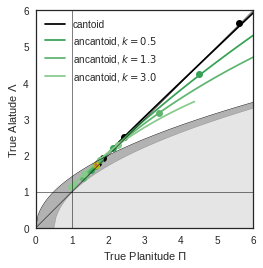

In [19]:
for X, c in zip(xi, colors_x[1:]):
    Lambda = np.sqrt(3*X)*(1+sb)/(np.sqrt(1+0.2*X*beta_arr)*(1-X*beta_arr))
    k = 2./X -2
    Ak = 1./15 - 3*k/20
    Ckb = 0.5*(Ak-beta_arr/15.)
    Rtt = Ckb/(1+sb) + (1+2*sb)/6.
    Pi = 1./(1-2*Rtt)
    if X==1.0:
        label=r"cantoid"
        c = "k"
    else:
        label=r"ancantoid, $k={:.1f}$".format(k)
    plt.plot(Pi, Lambda, label=label, c=c)
    ############### Estimate and plot numerical estimations #####################
    t = np.zeros_like(2*theta)
    for b in beta_d:
        shell = Shell(beta=b, innertype="anisotropic", xi=X)
        R = shell.radius(theta)
        R0 = R[0]
        t, R = complete_shape(R, theta)
        t = np.asarray(t)
        R = np.asarray(R)
        Rc =  num_fit(R, t, epsilon=1e-2)
        Pi_d = Rc/R0
        Lambda_d = np.sqrt(3*X)*(1+np.sqrt(b))/(np.sqrt(1+0.2*X*b)*(1-X*b))
        marker_color = c
        marker_shape = "o"
        plt.plot(Pi_d, Lambda_d, c=marker_color, marker=marker_shape)
    #############################################################################
plt.plot(5./3, np.sqrt(3.), c="y", marker="o", lw=3, alpha=1)  #Plot Wilkinoid shape
#############  Numerical estimation of Alatude and planitude for wilkinoid shape #################
R_w = wilkinoid(theta)
t_w = np.zeros_like(2*theta)
t_w, R_w = complete_shape(R_w, theta)
t_w = np.asarray(t_w)
R_w = np.asarray(R_w)
Pi_w = num_fit(R_w, t_w, epsilon=1e-2)
Lambda_w = np.sqrt(3.)
plt.plot(Pi_w, Lambda_w, c="m", marker="*", alpha=0.4)
##################################################################################################
plt.legend()
plt.xlabel(r"True Planitude $\Pi$")
plt.ylabel(r"True Alatude $\Lambda$")
#################### Quadric regions shades ############################
Pi_arr = np.linspace(0, 6, 100)
L_par = np.sqrt(2*Pi_arr)
L_circ = np.sqrt(2*Pi_arr - 1)
L_circ[~np.isfinite(L_circ)] = 0.0 
plt.plot(Pi_arr, L_par, "k", lw=0.5)
plt.plot(Pi_arr, Pi_arr, "k", lw=0.5)
plt.plot(Pi_arr, np.ones_like(Pi_arr), "k", lw=0.5)
plt.plot(np.ones_like(Pi_arr), Pi_arr, "k", lw=0.5)
plt.fill_between(Pi_arr, L_par, L_circ, alpha=0.3, color="black")
plt.fill_between(Pi_arr, L_circ, alpha=0.1, color="black")
########################################################################
plt.axes().set_aspect('equal')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.savefig("./Figures/Pi-vs-Lambda.pdf")

# With this we can obtain $\theta_\infty$ defined as $\theta_\infty + \theta_{1\infty} = \pi$ solving the implicit equation for $\theta_\infty$:

$$\theta_\infty - \frac{k+2(1-\beta)}{k+2}\tan\theta_\infty = \pi + 2\beta I$$
This equation and the one applicable to the cantoid shocks are available in the Shell class